## Connect to Google gdrive

In [1]:
from google.colab import drive
drive.mount('/content/gdrive')

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3Aietf%3Awg%3Aoauth%3A2.0%3Aoob&scope=email%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdocs.test%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdrive%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdrive.photos.readonly%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fpeopleapi.readonly&response_type=code

Enter your authorization code:
··········
Mounted at /content/gdrive


## Download code from github

In [1]:
!git clone https://github.com/kokheng1025/SelfDrivingCar.git

Cloning into 'SelfDrivingCar'...
remote: Enumerating objects: 24, done.
remote: Counting objects: 100% (24/24), done.
remote: Compressing objects: 100% (22/22), done.
remote: Total 24 (delta 1), reused 24 (delta 1), pack-reused 0
Unpacking objects: 100% (24/24), done.


In [2]:
cd SelfDrivingCar/CarND-LaneLines-P1/

/content/SelfDrivingCar/CarND-LaneLines-P1


## Import packages

In [0]:
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import numpy as np
import glob
import cv2
import os

%matplotlib inline

## Data visualization

In [0]:
#loop through all the images
def show_all_images(images):    
    plt.figure(figsize=(10,10))
    for i, image in enumerate(images):
        plt.subplot(3, 2, i+1)
        plt.grid("off")
        plt.imshow(image)
    plt.tight_layout(pad=0, h_pad=0, w_pad=0)
    plt.show()

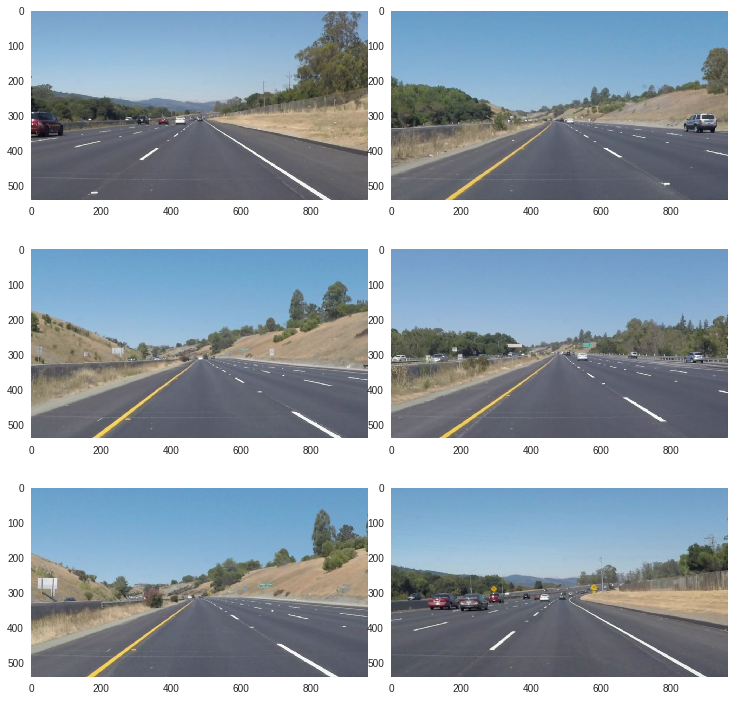

In [8]:
test_images = [plt.imread(path) for path in glob.glob('test_images/*.jpg')]
show_all_images(test_images)

## Apply differnt image filter techniques and visualize them

In [0]:
def GrayBlur(image):
  hsv = cv2.cvtColor(image,cv2.COLOR_RGB2HSV)
  yellow = cv2.inRange(hsv, (20, 80, 80), (25, 255, 255))
  white = cv2.inRange(hsv, (0, 0, 180), (255, 25, 255))
  gray = cv2.bitwise_or(yellow, white)
  
  # Define a kernel size and apply Gaussian smoothing
  kernel_size = 3
  blur_gray = cv2.GaussianBlur(gray,(kernel_size, kernel_size),0)
  
  return blur_gray

def Canny(image, low_threshold, high_threshold):
  return cv2.Canny(image, low_threshold, high_threshold)

def ROI(image):
  # Find region of interest
  mask = np.zeros_like(image, dtype=np.uint8)
  ignore_mask_color = 255

  ysize = image.shape[0]
  xsize = image.shape[1]
  vertices = np.array([[(0,ysize),(425, 315), (540, 315), (xsize,ysize)]],dtype=np.int32)
  polygons = np.array([[(150, ysize), (900, ysize), (450, 320)]], dtype=np.int32)

  cv2.fillPoly(mask, vertices, ignore_mask_color)
  masked_edges = cv2.bitwise_and(image, mask)
  return masked_edges

def Houghlines(image, rho, theta, threshold, min_line_length, max_line_gap):
  lines = cv2.HoughLinesP(image, rho, theta, threshold, np.array([]), 
                          min_line_length, max_line_gap)
  line_image = np.zeros((img.shape[0], img.shape[1], 3), dtype=np.uint8) 
  
  for line in lines:
      for x1,y1,x2,y2 in line:
          cv2.line(line_image,(x1,y1),(x2,y2),(255,0,0),10)
  return line_image


In [0]:
def processImage(image): 

  blur_gray = GrayBlur(image)
  edges = Canny(blur_gray, 64, 192)
  masked_edges = ROI(edges)
  line_image = Houghlines(masked_edges, 1, np.pi/180, 32, 1, 200)

  # Create a "color" binary image to combine with line image
  color_edges = np.dstack((masked_edges, masked_edges, masked_edges)) 

  # Draw the lines on the edge image
  combo = cv2.addWeighted(image, 0.9, line_image, 0.9, 0) 
  
  return combo

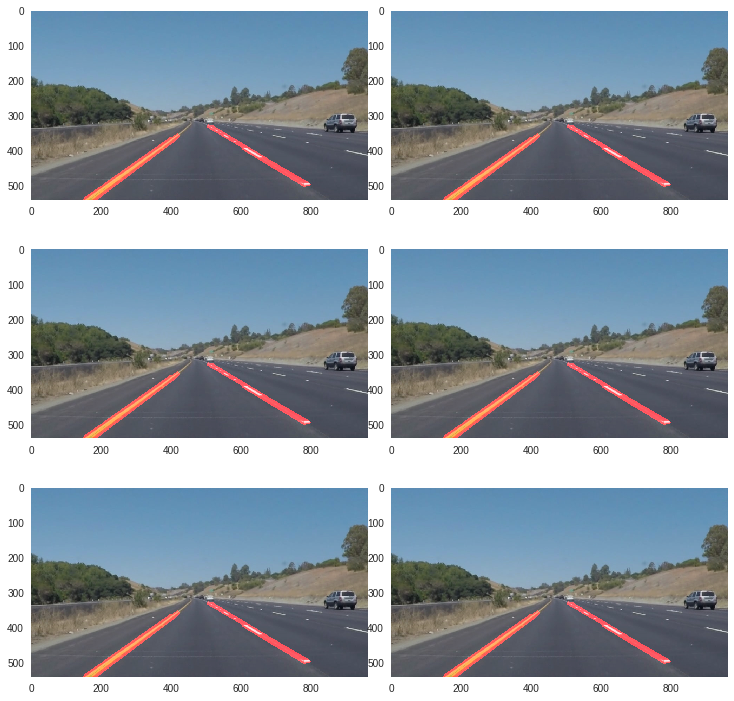

In [33]:
plt.figure(figsize=(10,10))
for i in range(len(test_images)):
    plt.subplot(3, 2, i+1)
    plt.grid("off")
    combo = processImage(test_images[1])
    plt.imshow(combo)
plt.tight_layout(pad=0, h_pad=0, w_pad=0)
plt.show()

## Generate video 

In [0]:
!pip install moviepy

In [35]:
from moviepy.editor import VideoFileClip
from IPython.display import HTML

import imageio
imageio.plugins.ffmpeg.download()

Imageio: 'ffmpeg-linux64-v3.3.1' was not found on your computer; downloading it now.
Try 1. Download from https://github.com/imageio/imageio-binaries/raw/master/ffmpeg/ffmpeg-linux64-v3.3.1 (43.8 MB)
Downloading: 8192/45929032 bytes (0.0%)663552/45929032 bytes (1.4%)1851392/45929032 bytes (4.0%)3383296/45929032 bytes (7.4%)5349376/45929032 bytes (11.6%)7389184/45929032 bytes (16.1%)9199616/45929032 bytes (20.0%)11100160/45929032 bytes (24.2%)12869632/45929032 bytes (28.0%)14827520/45929032 bytes (32.3%)16883712/45929032 bytes (36.8%)18980864/45929032 bytes (41.3%)21094400/45929032 bytes (45.9%)23248896/45

In [0]:
!mkdir test_videos_output
#!rm -rf test_videos_output/

In [0]:
challenge_video = VideoFileClip("./test_videos/challenge.mp4")
solidWhiteRight_video = VideoFileClip("./test_videos/solidWhiteRight.mp4")
solidYellowLeft_video = VideoFileClip("./test_videos/solidYellowLeft.mp4")

In [96]:
out = os.path.join("test_videos_output/", "Processed_solidWhiteRight.mp4")
processVideo = solidWhiteRight_video.fl_image(processImage)
%time processVideo.write_videofile(out, audio=False)

test_videos_output/Processed_solidWhiteRight.mp4
[MoviePy] >>>> Building video test_videos_output/Processed_solidWhiteRight.mp4
[MoviePy] Writing video test_videos_output/Processed_solidWhiteRight.mp4


100%|█████████▉| 221/222 [00:12<00:00, 14.57it/s]


[MoviePy] Done.
[MoviePy] >>>> Video ready: test_videos_output/Processed_solidWhiteRight.mp4 

CPU times: user 7.16 s, sys: 857 ms, total: 8.02 s
Wall time: 14.6 s


In [99]:
out = os.path.join("test_videos_output/", "Processed_solidYellowLeft.mp4")
processVideo = solidYellowLeft_video.fl_image(processImage)
%time processVideo.write_videofile(out, audio=False)

[MoviePy] >>>> Building video test_videos_output/Processed_solidYellowLeft.mp4
[MoviePy] Writing video test_videos_output/Processed_solidYellowLeft.mp4


100%|█████████▉| 681/682 [00:43<00:00, 15.15it/s]


[MoviePy] Done.
[MoviePy] >>>> Video ready: test_videos_output/Processed_solidYellowLeft.mp4 

CPU times: user 22.1 s, sys: 2.89 s, total: 25 s
Wall time: 45 s


In [101]:
out = os.path.join("test_videos_output/", "Processed_challenge.mp4")
processVideo = challenge_video.fl_image(processImage)
%time processVideo.write_videofile(out, audio=False)

error: ignored